(364, 1)
(30, 1)
(334, 1)
(333, 1, 1)
(333, 1)
Epoch 1/100
333/333 [==============================] - 2s 5ms/step - loss: 0.0636
Epoch 2/100
333/333 [==============================] - 0s 251us/step - loss: 0.0433
Epoch 3/100
333/333 [==============================] - 0s 240us/step - loss: 0.0357
Epoch 4/100
333/333 [==============================] - 0s 237us/step - loss: 0.0324
Epoch 5/100
333/333 [==============================] - 0s 237us/step - loss: 0.0300
Epoch 6/100
333/333 [==============================] - 0s 237us/step - loss: 0.0274
Epoch 7/100
333/333 [==============================] - 0s 252us/step - loss: 0.0248
Epoch 8/100
333/333 [==============================] - 0s 252us/step - loss: 0.0220
Epoch 9/100
333/333 [==============================] - 0s 231us/step - loss: 0.0192
Epoch 10/100
333/333 [==============================] - 0s 234us/step - loss: 0.0164
Epoch 11/100
333/333 [==============================] - 0s 240us/step - loss: 0.0136
Epoch 12/100
333/333 [=======

333/333 [==============================] - 0s 234us/step - loss: 0.0011
Epoch 97/100
333/333 [==============================] - 0s 234us/step - loss: 0.0011
Epoch 98/100
333/333 [==============================] - 0s 240us/step - loss: 0.0011
Epoch 99/100
333/333 [==============================] - 0s 231us/step - loss: 0.0011
Epoch 100/100
333/333 [==============================] - 0s 246us/step - loss: 0.0011
(30, 1)
ss
[[[-0.02159845]]

 [[-0.02299562]]

 [[-0.02578805]]

 [[-0.0222707 ]]

 [[-0.04450043]]

 [[-0.09100326]]

 [[-0.10117907]]

 [[-0.10006673]]

 [[-0.11768707]]

 [[-0.11882737]]

 [[-0.15343589]]

 [[-0.14629644]]

 [[-0.15872238]]

 [[-0.13283673]]

 [[-0.12103911]]

 [[-0.13258524]]

 [[-0.13185633]]

 [[-0.12812055]]

 [[-0.14283893]]

 [[-0.1432827 ]]

 [[-0.15087242]]

 [[-0.1593644 ]]

 [[-0.18418416]]

 [[-0.18199897]]

 [[-0.1751216 ]]

 [[-0.17547799]]

 [[-0.18267226]]

 [[-0.18003429]]

 [[-0.1841018 ]]

 [[-0.19354908]]]


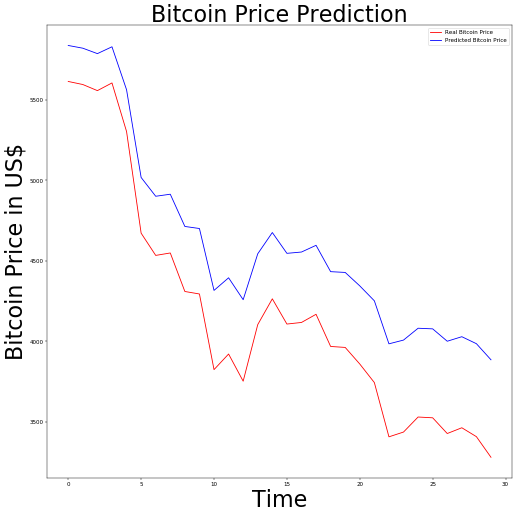

In [23]:
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
%matplotlib inline

df = pd.read_csv("bitcoin_price.csv")

#old trick Esc R Y 
df_new = df.drop(columns = ['2017-12-15 00:00:00'])
print(df_new.shape)
x_train = df_new[:len(df_new)-30]
x_test = df_new[len(df_new)-30:]
print(x_test.shape)

#We use fit_transform to center the data in a way that it has 0 mean and 1 standard error.
x_training_without_scaling = x_train.values #why do this step
min_max_scaler = MinMaxScaler()
x_training = min_max_scaler.fit_transform(x_train)
print(x_training.shape)

#from the same timeseries column getting training and testing examples
x_training_final = x_training[0:len(x_training)-1]
y_training_final = x_training[1:len(x_training)]

model = Sequential()
#The input to every LSTM layer must be three-dimensional.
#When defining the input layer of your LSTM network, the network assumes you have 1 or more samples and requires that
#you specify the number of time steps and the number of features. You can do this by specifying a tuple to the “input_shape”
#argument.
#LSTM layer is a recurrent layer, hence it expects a 3-dimensional input (batch_size, timesteps, no_of_features)

x_training_finally = x_training_final.reshape(333,1,1) 
#y_training_finally = y_training_final.reshape(333,1)



#VVI: No of elements before reshaping i.e. 1 * 333 should equal the numbe rof elements after reshaping i.e., 1*333*1

first_layer = LSTM(units = 4,input_shape=(None, 1)) ##DO NOT USE batch_input_shape here, I repeat DO NOT


#understand what yu mean by units here

model.add(first_layer)
model.add(Dense(units = 1)) 
# print(x_training_final.shape)

model.compile(optimizer = "adam", loss = "mean_squared_error")

print(x_training_finally.shape)
print(y_training_final.shape)
model.fit(x_training_finally, y_training_final, batch_size = 5, epochs = 50) 
#lets test the model
test_set = x_test.values

print(test_set.shape)
print("ss")
test_set = min_max_scaler.transform(test_set)# IMP: why fit_transform and transform, Now you know it!
test_set_final = test_set.reshape(30,1,1)
print(test_set_final)
predictions_on_test_set = model.predict(test_set_final)
predictions_on_test_set = min_max_scaler.inverse_transform(predictions_on_test_set)

#THere's no fun in Machine Learning if you do not visualize and see what you have done

plt.figure(figsize=(15, 15), dpi=40, facecolor = 'w', edgecolor = 'k')

plt.plot(x_test.values[:, 0], color='red', label='Real Bitcoin Price')
plt.plot(predictions_on_test_set[:, 0], color = 'blue', label = 'Predicted Bitcoin Price')

plt.title('Bitcoin Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('Bitcoin Price in US$', fontsize = 40)
plt.legend(loc = 'best')
plt.show()